<a href="https://colab.research.google.com/github/Awoyawson/Artificial-Neutral-Network/blob/main/Binary_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# to mount Google drive drive 

from google.colab import drive
drive.mount('/content/drive')

#import pandas as pd
#dataset=pd.read_csv('/content/drive/MyDrive/Churn_Modelling')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
dataset = pd.read_csv("/content/Churn_Modelling.csv")
#Kaggle database (source: https://www.kaggle.com/aakash50897/churn-modellingcsv?select=Churn_Modelling.csv
print(dataset)

      RowNumber  CustomerId    Surname  ...  IsActiveMember EstimatedSalary Exited
0             1    15634602   Hargrave  ...               1       101348.88      1
1             2    15647311       Hill  ...               1       112542.58      0
2             3    15619304       Onio  ...               0       113931.57      1
3             4    15701354       Boni  ...               0        93826.63      0
4             5    15737888   Mitchell  ...               1        79084.10      0
...         ...         ...        ...  ...             ...             ...    ...
9995       9996    15606229   Obijiaku  ...               0        96270.64      0
9996       9997    15569892  Johnstone  ...               1       101699.77      0
9997       9998    15584532        Liu  ...               1        42085.58      1
9998       9999    15682355  Sabbatini  ...               0        92888.52      1
9999      10000    15628319     Walker  ...               0        38190.78      0

[10

In [27]:
# independent variable names
print(dataset.columns) 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


In [28]:
print(dataset.index)

RangeIndex(start=0, stop=10000, step=1)


In [29]:
# Not all the rows are important eg : RowNumber , CustomerId) Hence we drop them
X = dataset.iloc[:,3:13].values
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [31]:
y = dataset.iloc[:, 13].values
y

array([1, 0, 1, ..., 1, 1, 0])

In [32]:
#Data encoding :
#We have to encode categorical data (such as Geography and Gender)
#ORDINAL ENCODING - way 1:
from sklearn.preprocessing import LabelEncoder

X_ord_1 = X

labelencoder_X_1 = LabelEncoder() #instantiate an object of the class LabelEncoder
X_ord_1[:, 1] = labelencoder_X_1.fit_transform(X[:, 1]) #ordinal encoding for column 1

labelencoder_X_2 = LabelEncoder()
X_ord_1[:, 2] = labelencoder_X_2.fit_transform(X[:, 2]) #ordinal encoding for column 2
X_ord_1

array([[619, 0, 0, ..., 1, 1, 101348.88],
       [608, 2, 0, ..., 0, 1, 112542.58],
       [502, 0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0, 0, ..., 0, 1, 42085.58],
       [772, 1, 1, ..., 1, 0, 92888.52],
       [792, 0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [33]:
#ORDINAL ENCODING - way 2:
from sklearn.preprocessing import OrdinalEncoder

X_ord_2 = X

ordinal_encoder_1 = OrdinalEncoder()
X_ord_2[:, 1] = ordinal_encoder_1.fit_transform([X[:, 1]])
X_ord_2

array([[619, 0.0, 0, ..., 1, 1, 101348.88],
       [608, 0.0, 0, ..., 0, 1, 112542.58],
       [502, 0.0, 0, ..., 1, 0, 113931.57],
       ...,
       [709, 0.0, 0, ..., 0, 1, 42085.58],
       [772, 0.0, 1, ..., 1, 0, 92888.52],
       [792, 0.0, 0, ..., 1, 0, 38190.78]], dtype=object)

In [34]:

X_ord_1 = X

In [35]:

#ONE-HOT ENCODING :
#Way 1 : using data values :
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np
ct = ColumnTransformer( #'encoder' is the name of the column transformer
    [('encoder', OneHotEncoder(), [1])],    # The column numbers to be transformed (here is [1] but can be [0, 1, 3])
    remainder='passthrough'                         # Leave the rest of the columns untouched
)
X = np.array(ct.fit_transform(X), dtype=np.float)
df = pd.DataFrame(X)
df
     

,0,1,2,3,4,5,6,7,8,9
0,1.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,1.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,1.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,1.0,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,1.0,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,1.0,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,1.0,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [36]:
#ONE-HOT ENCODING :
#Way 2 : using data frame :
X_df = dataset.iloc[:, 3: 13]
X_df = pd.concat([X_df, pd.get_dummies(X_df['Geography'], prefix='country', drop_first=True)], axis=1)  #drops the first column
#axis = 1 means to concatenate along the columns (put one column beside another)
X_df.drop(['Geography'], axis=1, inplace=True)  #get rid of the original Geography column
X_df


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,country_Germany,country_Spain
0,619,Female,42,2,0.00,1,1,1,101348.88,0,0
1,608,Female,41,1,83807.86,1,0,1,112542.58,0,1
2,502,Female,42,8,159660.80,3,1,0,113931.57,0,0
3,699,Female,39,1,0.00,2,0,0,93826.63,0,0
4,850,Female,43,2,125510.82,1,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,516,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,709,Female,36,7,0.00,1,0,1,42085.58,0,0
9998,772,Male,42,3,75075.31,2,1,0,92888.52,1,0


In [37]:
#We remove the first column to avoid the dummy data trap
'''Dummy data trap : A scenario where independent variables are highly correlated (one variable predicts the value of others). 
In one-hot encoding, one dummy variable can be predicted through other dummy variables, thus causing redundancy
==> Using all dummy variables for regression models lead to dummy variable trap
==> We exclude one of those dummy variable.'''

X = X [:,1:]
data  = pd.DataFrame(X)
data

,0,1,2,3,4,5,6,7,8
0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10
...,...,...,...,...,...,...,...,...,...
9995,771.0,1.0,39.0,5.0,0.00,2.0,1.0,0.0,96270.64
9996,516.0,1.0,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77
9997,709.0,0.0,36.0,7.0,0.00,1.0,0.0,1.0,42085.58
9998,772.0,1.0,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52


In [38]:
# Split the data into training and test set (20% for the test set)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.2, random_state = 10) # We use random_state to make sure splitting contains the same data each time

In [39]:
#Standardise the data (x_standardised = (x - x_mean)/std_dev)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) #note that we use the scale set from the training set to transform the test set
df = pd.DataFrame(X_train)
df

,0,1,2,3,4,5,6,7,8
0,1.789744,0.912557,0.943942,1.042715,0.909825,-0.918722,0.640072,0.975305,-0.560873
1,0.260405,-1.095822,2.359325,-0.350532,0.649509,-0.918722,0.640072,0.975305,-0.156221
2,-0.225264,0.912557,-0.471440,0.346091,-1.220910,0.799318,0.640072,-1.025320,1.569218
3,0.394739,-1.095822,-0.754517,-0.698844,1.014868,-0.918722,-1.562325,0.975305,0.357143
4,1.407409,0.912557,1.132660,-1.743780,-0.291139,-0.918722,-1.562325,0.975305,0.737628
...,...,...,...,...,...,...,...,...,...
7995,0.270738,0.912557,-0.848876,-1.395468,0.028652,-0.918722,-1.562325,0.975305,1.288797
7996,-0.535265,0.912557,-0.565799,-0.350532,-0.394232,-0.918722,0.640072,-1.025320,0.199888
7997,-1.971603,-1.095822,0.094713,0.346091,0.690343,0.799318,0.640072,-1.025320,-0.149070
7998,0.601406,-1.095822,-0.471440,-1.047156,0.564993,-0.918722,0.640072,-1.025320,-0.749696


In [41]:
#Building the model : 
#We use 2 dense layers

import tensorflow as tf
model = tf.keras.models.Sequential()

#add input layer and first hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

#add 2nd hidden layer
model.add(tf.keras.layers.Dense(units=6, kernel_initializer='uniform', activation='relu'))

'''The number of units is mainly chosen by experience. In general, based on experimentation, 
setting it to the average between the number of the input nodes (11) and the number of the 
ouput nodes (1). Cross-validation can also be used to choose to choose the best parameters (parameter tuning).'''

'''random_uniform: Weights are initialized to uniformly random small values between -0.05 to 0.05.
random_normal: Weights are initialized according to a Gaussian distribution, with zero mean and a small standard deviation of 0.05.
zero: All weights are initialized to zero.'''

'random_uniform: Weights are initialized to uniformly random small values between -0.05 to 0.05.\nrandom_normal: Weights are initialized according to a Gaussian distribution, with zero mean and a small standard deviation of 0.05.\nzero: All weights are initialized to zero.'

In [43]:
#Add the output layer
model.add(tf.keras.layers.Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #Sigmoid for binary, Softmax for multiclass

#Compilation
model.compile(optimizer = 'adam', loss ='binary_crossentropy', metrics = ['accuracy'])




In [ ]:
#Training
# verbose=0 supresses the print of each epochs
history = model.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose=0)
history

In [48]:
# Since the print of the epochs is supress this will print Loss and accuracy for the model
loss, accuracy = model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.5154 - accuracy: 0.7890


In [51]:
#Evaluation
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)
print(y_pred)

[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [ ]:
#Predict using the info of a new customer
new_customer = [[0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]]
new_customer = sc.transform(new_customer)
new_prediction = model.predict(new_customer)
new_prediction = (new_prediction > 0.5)
print(new_prediction)

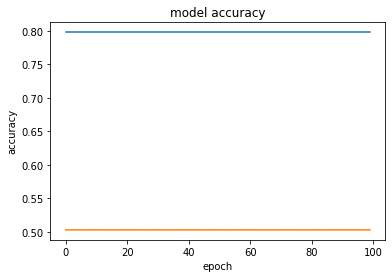

In [58]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

In [62]:
#Note : An alternative to using train_test_split() is to specify a validation_split percentage. 
#This is done when fitting the model, for example:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

history = model.fit(X,y, verbose = 0,
                    validation_split = 0.2, # split data in 80-20 sets
                    epochs = 100,
                    batch_size = 10)

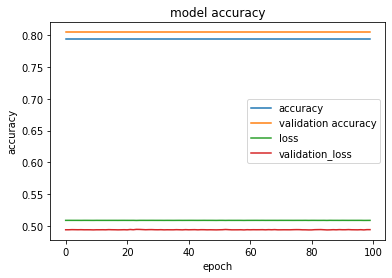

In [63]:
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['accuracy','validation accuracy', 'loss', 'validation_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()